# EVA explorer

Source: https://data.nasa.gov/Raw-Data/Extra-vehicular-Activity-EVA-US-and-Russia/9kcy-zwvn

## Import the original database

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

df_eva = pd.read_csv('Extra-vehicular_Activity__EVA__-_US_and_Russia.csv')

## Explore the dataset

In [2]:
df_eva.head(4)

,EVA #,Country,Crew,Vehicle,Date,Duration,Purpose
0,1.0,USA,Ed White,Gemini IV,06/03/1965,0:36,First U.S. EVA. Used HHMU and took photos. G...
1,2.0,USA,David Scott,Gemini VIII,"March 16-17, 1966",0:00,HHMU EVA cancelled before starting by stuck on...
2,3.0,USA,Eugene Cernan,Gemini IX-A,06/05/1966,2:07,"Inadequate restraints, stiff 25ft umbilical an..."
3,4.0,USA,Mike Collins,Gemini X,07/19/1966,0:50,Standup EVA. UV photos of stars. Ended by ey...


In [3]:
df_eva.tail(4)

,EVA #,Country,Crew,Vehicle,Date,Duration,Purpose
371,368.0,Russia,Pavel Vinogradov Roman Romanenko,ISS Incr-35,04/19/2013,6:38,"Installed plasma experiment/cables/probes, rep..."
372,369.0,Russia,Fyodor Yurchikhin Alexander M...,ISS Incr-36,06/24/2013,6:34,Power cable clamps installed and Kurs tested i...
373,370.0,Russia,Fyodor Yurchikhin Alexander M...,ISS Incr-36,08/16/2013,7:29,"Â Installed VINOSLIVOST experiment on MRM2, 2..."
374,371.0,Russia,Fyodor Yurchikhin Alexander M...,ISS Incr-36,08/22/2013,5:58,Â Retrieved laser downlink comm experiment fr...


In [4]:
df_eva.columns

Index(['EVA #', 'Country', 'Crew    ', 'Vehicle', 'Date', 'Duration',
       'Purpose '],
      dtype='object')

In [5]:
df_eva.shape

(375, 7)

## Clean the database

In [6]:
from duration import to_seconds as tomin
import dateparser

hmm = '0:56'
tomin(hmm)

56

In [7]:
df_eva['Duration'].head()

0    0:36
1    0:00
2    2:07
3    0:50
4    0:39
Name: Duration, dtype: object

In [8]:
def to_min(hmm):
    """ Convert the time from h:mm to the total of minutes"""
    try: 
        return tomin(hmm) 
    except (ValueError, TypeError): 
            return 0

df_eva['Duration'] = df_eva['Duration'].apply(to_min)

In [9]:
df_eva['Duration'].head()

0     36
1      0
2    127
3     50
4     39
Name: Duration, dtype: int64

In [10]:
def to_date(datestr):
    """ Convert Date string in DateTime type """
    try: 
        return dateparser.parse(datestr)
    except (Exception) as e: 
        print(e, datestr)

df_eva['Date'] = df_eva['Date'].apply(to_date)

In [11]:
df_eva['Date'].head()

0   1965-06-03
1   1966-03-16
2   1966-06-05
3   1966-07-19
4   1966-07-20
Name: Date, dtype: datetime64[ns]

## Exploring the clean database

In [12]:
df_eva.head(10)

,EVA #,Country,Crew,Vehicle,Date,Duration,Purpose
0,1.0,USA,Ed White,Gemini IV,1965-06-03,36,First U.S. EVA. Used HHMU and took photos. G...
1,2.0,USA,David Scott,Gemini VIII,1966-03-16,0,HHMU EVA cancelled before starting by stuck on...
2,3.0,USA,Eugene Cernan,Gemini IX-A,1966-06-05,127,"Inadequate restraints, stiff 25ft umbilical an..."
3,4.0,USA,Mike Collins,Gemini X,1966-07-19,50,Standup EVA. UV photos of stars. Ended by ey...
4,5.0,USA,Mike Collins,Gemini X,1966-07-20,39,Retrieved MMOD experiment from docked Agena. ...
5,6.0,USA,Richard Gordon,Gemini XI,1966-09-13,44,Attached tether between Agena and Gemini. EVA...
6,7.0,USA,Richard Gordon,Gemini XI,1966-09-14,130,Standup EVA. Took star photos. Agena tether ops
7,8.0,USA,Buzz Aldrin,Gemini XII,1966-11-12,149,Standup EVA. Science tasks. Took star photos
8,9.0,USA,Buzz Aldrin,Gemini XII,1966-11-13,126,Attached tether between Agena and Gemini. UV ...
9,10.0,USA,Buzz Aldrin,Gemini XII,1966-11-14,55,Standup EVA. Jettisoned equipment. Took photos


In [13]:
df_eva.tail(4)

,EVA #,Country,Crew,Vehicle,Date,Duration,Purpose
371,368.0,Russia,Pavel Vinogradov Roman Romanenko,ISS Incr-35,2013-04-19,398,"Installed plasma experiment/cables/probes, rep..."
372,369.0,Russia,Fyodor Yurchikhin Alexander M...,ISS Incr-36,2013-06-24,394,Power cable clamps installed and Kurs tested i...
373,370.0,Russia,Fyodor Yurchikhin Alexander M...,ISS Incr-36,2013-08-16,449,"Â Installed VINOSLIVOST experiment on MRM2, 2..."
374,371.0,Russia,Fyodor Yurchikhin Alexander M...,ISS Incr-36,2013-08-22,358,Â Retrieved laser downlink comm experiment fr...


## Visualise the exploration of the data base

Graph 1

In [14]:
len(df_eva['EVA #'])

375

In [15]:
len(df_eva['Duration'])

375

In [16]:
df_eva.Duration.max()

536

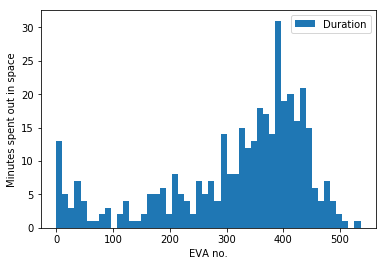

In [17]:
df_eva.plot(x='EVA #', y='Duration', kind='hist', bins=50)

plt.xlabel('EVA no.')
plt.ylabel('Minutes spent out in space')
plt.show()

Graph 2

In [18]:
df_eva['color'] = 'r'
df_eva['color'] = df_eva['color'].where(df_eva.Country == 'USA', 'b')

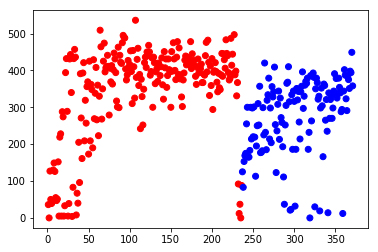

In [19]:
plt.scatter(df_eva['EVA #'], df_eva['Duration'], color=df_eva['color'])
plt.show()

In [20]:
df_eva['ts'] = pd.to_datetime(df_eva['Date'])

In [34]:
#df_eva.set_index('ts').groupby([pd.TimeGrouper('1M'), 'Country']) #['Duration'].mean().unstack(-1).plot()

In [35]:
df_eva.columns

Index(['EVA #', 'Country', 'Crew    ', 'Vehicle', 'Date', 'Duration',
       'Purpose ', 'color', 'ts'],
      dtype='object')

In [36]:
crew_names = df_eva.loc[:, ['EVA #', 'Crew    ']]

In [37]:
crew_names.head(10)

,EVA #,Crew
0,1.0,Ed White
1,2.0,David Scott
2,3.0,Eugene Cernan
3,4.0,Mike Collins
4,5.0,Mike Collins
5,6.0,Richard Gordon
6,7.0,Richard Gordon
7,8.0,Buzz Aldrin
8,9.0,Buzz Aldrin
9,10.0,Buzz Aldrin


In [38]:
crew_names.tail(15)

,EVA #,Crew
360,356.0,Yuri Lonchakov Mike Fincke
361,357.0,Yuri Lonchakov Mike Fincke
362,358.0,Gennady Padalka Mike Barratt
363,359.0,Gennady Padalka Mike Barratt
364,360.0,Oleg Kotov Maxim Suraev
365,361.0,Fyodor Yurchikin Mikhail Kornienko
366,362.0,Fyodor Yurchikin Oleg Skripochka
367,363.0,Dmitry Kondratiev Oleg Skripochka
368,365.0,Sergei Volkov Alexander Samokutyaev
369,366.0,Oleg Kononenko Anton Shkaplerov
